<a href="https://colab.research.google.com/github/aditiiilaturkar/911Interactions/blob/main/6Months_KNN_Cosine_with_date_mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
pip install pyodbc


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# Import necessary libraries

import pandas as pd
import pyodbc
import sqlite3
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

import difflib 
 

In [42]:
# Connect to database present on-prem

cnxn = sqlite3.connect('research.sqlite')

cursor = cnxn.cursor()

In [43]:
#basic command
cursor.execute('''
select * from dev_dispatch_incidents

''')
cursor.fetchall()

[(6903069707075595,
  'Chest Pain',
  28,
  '2021-01-01 01:08:09',
  '317 CHELSEA ST DELAWARE',
  '2022-02-25 15:14:31',
  '2022-02-25 15:14:31',
  None),
 (6903069707075603,
  '911 Cellular Hang-Up/Open/Misdial',
  213,
  '2021-01-01 18:05:08',
  '6249 HOWARD RD BROWN TWP',
  '2022-02-25 15:14:31',
  '2022-02-25 15:14:31',
  None),
 (6903069707075605,
  'Assist Other Agency/Unit',
  141,
  '2021-01-01 14:33:24',
  '397 CHARLESCARN DR POWELL',
  '2022-02-25 15:14:31',
  '2022-02-25 15:14:31',
  None),
 (6903069707075615,
  'Loud Disturbance',
  15,
  '2021-01-01 00:31:03',
  '0 TREE LAKE BLVD/SCIOTO RIDGE DR CONCORD TWP',
  '2022-02-25 15:14:31',
  '2022-02-25 15:14:31',
  None),
 (6903069707075623,
  'Injured From A Fall',
  338,
  '2021-01-02 04:28:48',
  '79 ROCK CREEK DR DELAWARE',
  '2022-02-25 15:14:31',
  '2022-02-25 15:14:31',
  None),
 (6903069707075627,
  'Chest Pain',
  273,
  '2021-01-01 21:09:55',
  '2392 COMMON BENT DR SUNBURY',
  '2022-02-25 15:14:31',
  '2022-02-25 15:1

In [44]:
#converting the sql into df for EDA
sql_query = pd.read_sql_query ('''
select * from dev_dispatch_incidents
                               ''', cnxn)

df = pd.DataFrame(sql_query)
df

,id,nature,incidentno,start,address,created_at,updated_at,deleted_at
0,6903069707075595,Chest Pain,28,2021-01-01 01:08:09,317 CHELSEA ST DELAWARE,2022-02-25 15:14:31,2022-02-25 15:14:31,None
1,6903069707075603,911 Cellular Hang-Up/Open/Misdial,213,2021-01-01 18:05:08,6249 HOWARD RD BROWN TWP,2022-02-25 15:14:31,2022-02-25 15:14:31,None
2,6903069707075605,Assist Other Agency/Unit,141,2021-01-01 14:33:24,397 CHARLESCARN DR POWELL,2022-02-25 15:14:31,2022-02-25 15:14:31,None
3,6903069707075615,Loud Disturbance,15,2021-01-01 00:31:03,0 TREE LAKE BLVD/SCIOTO RIDGE DR CONCORD TWP,2022-02-25 15:14:31,2022-02-25 15:14:31,None
4,6903069707075623,Injured From A Fall,338,2021-01-02 04:28:48,79 ROCK CREEK DR DELAWARE,2022-02-25 15:14:31,2022-02-25 15:14:31,None
...,...,...,...,...,...,...,...,...
17362,6903070491411419,DOMESTIC,97664,2021-08-30 12:02:24,571 CARLE AVE ORANGE TWP,2022-02-25 15:17:38,2022-02-25 15:17:38,None
17363,6903070491411435,SICK PERSON,97694,2021-08-30 13:25:28,131 S MILLER DR SUNBURY,2022-02-25 15:17:38,2022-02-25 15:17:38,None
17364,6903070491411439,AUTO ACCIDENT HIT SKIP NON INJURY,97993,2021-08-31 08:23:26,8906 LAKE RIDGE DR ORANGE TWP,2022-02-25 15:17:38,2022-02-25 15:17:38,None
17365,6903070491411443,911 CELLULAR HANG-UP/OPEN/MISDIAL,97497,2021-08-29 23:18:31,7825 LANETTA LN GENOA TWP,2022-02-25 15:17:38,2022-02-25 15:17:38,None


In [45]:
print('Does the above DF have NULL values:\t',df.isnull().values.any())  #check if any value is null
print(df.isnull().sum()) #

Does the above DF have NULL values:	 True
id                0
nature            0
incidentno        0
start             0
address           0
created_at        0
updated_at        0
deleted_at    17367
dtype: int64


In [46]:
df.drop('deleted_at', inplace=True, axis=1)

In [47]:
df.drop(df.loc[df['address']=='0'].index, inplace=True)


In [48]:
#to filter out the months we require
df['month'] = pd.DatetimeIndex(df['start']).month

df

,id,nature,incidentno,start,address,created_at,updated_at,month
0,6903069707075595,Chest Pain,28,2021-01-01 01:08:09,317 CHELSEA ST DELAWARE,2022-02-25 15:14:31,2022-02-25 15:14:31,1
1,6903069707075603,911 Cellular Hang-Up/Open/Misdial,213,2021-01-01 18:05:08,6249 HOWARD RD BROWN TWP,2022-02-25 15:14:31,2022-02-25 15:14:31,1
2,6903069707075605,Assist Other Agency/Unit,141,2021-01-01 14:33:24,397 CHARLESCARN DR POWELL,2022-02-25 15:14:31,2022-02-25 15:14:31,1
3,6903069707075615,Loud Disturbance,15,2021-01-01 00:31:03,0 TREE LAKE BLVD/SCIOTO RIDGE DR CONCORD TWP,2022-02-25 15:14:31,2022-02-25 15:14:31,1
4,6903069707075623,Injured From A Fall,338,2021-01-02 04:28:48,79 ROCK CREEK DR DELAWARE,2022-02-25 15:14:31,2022-02-25 15:14:31,1
...,...,...,...,...,...,...,...,...
17362,6903070491411419,DOMESTIC,97664,2021-08-30 12:02:24,571 CARLE AVE ORANGE TWP,2022-02-25 15:17:38,2022-02-25 15:17:38,8
17363,6903070491411435,SICK PERSON,97694,2021-08-30 13:25:28,131 S MILLER DR SUNBURY,2022-02-25 15:17:38,2022-02-25 15:17:38,8
17364,6903070491411439,AUTO ACCIDENT HIT SKIP NON INJURY,97993,2021-08-31 08:23:26,8906 LAKE RIDGE DR ORANGE TWP,2022-02-25 15:17:38,2022-02-25 15:17:38,8
17365,6903070491411443,911 CELLULAR HANG-UP/OPEN/MISDIAL,97497,2021-08-29 23:18:31,7825 LANETTA LN GENOA TWP,2022-02-25 15:17:38,2022-02-25 15:17:38,8


In [49]:
df1 = df.loc[df['month'] <= 6]
df1["month"].unique()# since we need 6 month 
df1
df1.to_csv('6_months_ems_data.csv', index=False)

In [50]:
print(df.columns)

Index(['id', 'nature', 'incidentno', 'start', 'address', 'created_at',
       'updated_at', 'month'],
      dtype='object')


In [51]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Load the CSV files
df1 = pd.read_csv('6_months_ems_data.csv')
df2 = pd.read_excel('data_Exe.xlsx')

# Remove rows with missing or blank data
df1.dropna(subset=['address'], inplace=True)
df1 = df1[df1['address'] != '']
df2.dropna(subset=['AddressFinal'], inplace=True)
df2 = df2[df2['AddressFinal'] != '']

# Reset the index of the df2 DataFrame
df2.reset_index(drop=True, inplace=True)

# Convert the AddressExtracted column in the second file to a numeric vector
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2['AddressFinal'])
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)

# Initialize the KNN model
k = 3
knn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')

# Train the KNN model on the numeric vectors
knn.fit(X)

# Create a DataFrame to store the results
results_df_2 = pd.DataFrame(columns=['address', 'Neighbour1',  'Neighbour2', 'Neighbour3',  'maxSimilarityScore', 'AddressFinal'])

# Iterate over each row of the first file
for index, row in df1.iterrows():
    # Convert the address to a numeric vector
    address = row['address']
    address_vector = vectorizer.transform([address])
    address_vector = scaler.transform(address_vector)

    # Find the k nearest neighbors of the address
    distances, indices = knn.kneighbors(address_vector)

    # Get the nearest neighbors, their nature, and similarity scores
    neighbors = []
    nature = []
    similarity_scores = []
    for i, distance in zip(indices[0], distances[0]):
        neighbors.append(df2.loc[i, 'AddressFinal'])
        # nature.append(df2.loc[i, 'nature'])
        similarity_scores.append(1 - distance)

    # Find the neighbor with the maximum similarity score
    max_similarity_score = max(similarity_scores)
    max_similarity_score_index = similarity_scores.index(max_similarity_score)

    # Add the results to the DataFrame
    results_df_2.loc[index] = [address, neighbors[0],  neighbors[1], neighbors[2],  max_similarity_score, neighbors[max_similarity_score_index]]

# Save the results to a CSV file
results_df_2.to_csv('6_months_KNN_Cosine_results.csv', index=False)


<ipython-input-52-549819e92899>:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black', linewidth=1, fill=True) for i in range(len(bins))]


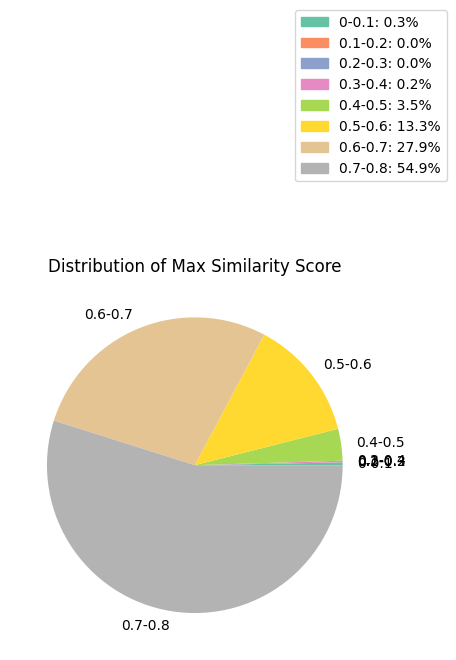

In [52]:
import matplotlib.pyplot as plt

# Calculate the frequency and percentage of each similarity score bin
bins = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8']
freq = [0] * len(bins)
total_rows = len(results_df_2)

for score in results_df_2['maxSimilarityScore']:
    if score < 0.1:
        freq[0] += 1
    elif score < 0.2:
        freq[1] += 1
    elif score < 0.3:
        freq[2] += 1
    elif score < 0.4:
        freq[3] += 1
    elif score < 0.5:
        freq[4] += 1
    elif score < 0.6:
        freq[5] += 1
    elif score < 0.7:
        freq[6] += 1
    else:
        freq[7] += 1

percent = [(f/total_rows)*100 for f in freq]

# Define colors for each bin
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# Create the pie chart
plt.pie(percent, labels=[bins[i] for i in range(len(bins))], colors=colors, autopct='')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black', linewidth=1, fill=True) for i in range(len(bins))]
labels = [f"{bins[i]}: {percent[i]:.1f}%" for i in range(len(bins))]
plt.legend(handles, labels, bbox_to_anchor=(1.2, 1.5), loc='center right')

plt.title('Distribution of Max Similarity Score')
plt.show()

In [53]:
import pandas as pd

# read the CSV file into a pandas dataframe
df = pd.read_excel('data_Exe.xlsx')

# extract the date from the "fileName" column using the str.split() method
df['date'] = df['fileName'].str.split('/').str[0]

# save the updated dataframe to a new CSV file
df.to_csv('data_Exe_with_date.csv', index=False)

In [54]:
import pandas as pd

# read the CSV file into a pandas dataframe
df = pd.read_csv('6_months_ems_data.csv')

# convert the "created_at" column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# extract the date from the "created_at" column using the dt.date method
df['date'] = df['created_at'].dt.date

# save the updated dataframe to a new CSV file
df.to_csv('6_months_ems_data_with_date.csv', index=False)


In [55]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Load the CSV files
df1 = pd.read_csv('6_months_ems_data_with_date.csv')
df2 = pd.read_csv('data_Exe_with_date.csv')

# Remove rows with missing or blank data
df1.dropna(subset=['address'], inplace=True)
df1 = df1[df1['address'] != '']
df2.dropna(subset=['AddressFinal'], inplace=True)
df2 = df2[df2['AddressFinal'] != '']

# Reset the index of the df2 DataFrame
df2.reset_index(drop=True, inplace=True)

# Convert the AddressExtracted column in the second file to a numeric vector
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df2['AddressFinal'])
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)

# Initialize the KNN model
k = 3
knn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='cosine')

# Train the KNN model on the numeric vectors
knn.fit(X)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['address', 'Neighbour1',  'Neighbour2', 'Neighbour3',  'maxSimilarityScore', 'AddressFinal', 'ems_data_date', 'address_extracted_date'])

# Iterate over each row of the first file
for index, row in df1.iterrows():
    # Convert the address to a numeric vector
    address = row['address']
    address_vector = vectorizer.transform([address])
    address_vector = scaler.transform(address_vector)

    # Find the k nearest neighbors of the address
    distances, indices = knn.kneighbors(address_vector)

    # Get the nearest neighbors, their nature, and similarity scores
    neighbors = []
    address_extracted_date = []
    similarity_scores = []
    for i, distance in zip(indices[0], distances[0]):
        neighbors.append(df2.loc[i, 'AddressFinal'])
        address_extracted_date.append(df2.loc[i, 'date'])
        similarity_scores.append(1 - distance)

    # Find the neighbor with the maximum similarity score
    max_similarity_score = max(similarity_scores)
    max_similarity_score_index = similarity_scores.index(max_similarity_score)
    
    # Get the ems_data_date and address_extracted_date of the neighbor with the maximum similarity score
    ems_data_date = df2.loc[indices[0][max_similarity_score_index], 'date']
    address_extracted_date = df2.loc[indices[0][max_similarity_score_index], 'date']

    # Add the results to the DataFrame
    results_df.loc[index] = [address, neighbors[0],  neighbors[1], neighbors[2],  max_similarity_score, neighbors[max_similarity_score_index], ems_data_date, address_extracted_date]

# Save the results to a CSV file
results_df.to_csv('6_months_KNN_Cosine_results_with_date.csv', index=False)


<ipython-input-56-8ddbe4c2ec6e>:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black', linewidth=1, fill=True) for i in range(len(bins))]


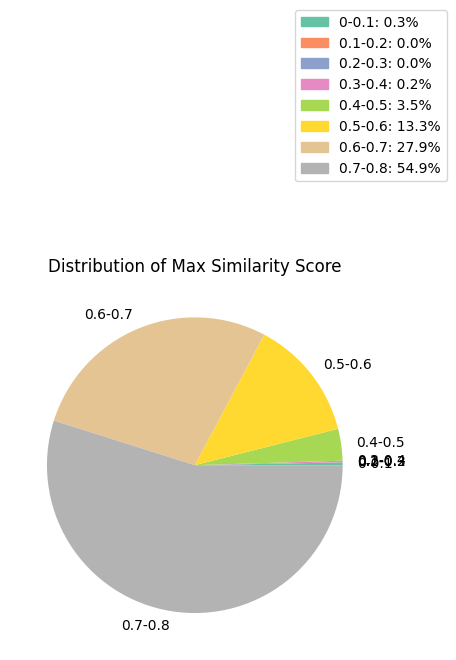

In [56]:
import matplotlib.pyplot as plt

# Calculate the frequency and percentage of each similarity score bin
bins = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8']
freq = [0] * len(bins)
total_rows = len(results_df)

for score in results_df['maxSimilarityScore']:
    if score < 0.1:
        freq[0] += 1
    elif score < 0.2:
        freq[1] += 1
    elif score < 0.3:
        freq[2] += 1
    elif score < 0.4:
        freq[3] += 1
    elif score < 0.5:
        freq[4] += 1
    elif score < 0.6:
        freq[5] += 1
    elif score < 0.7:
        freq[6] += 1
    else:
        freq[7] += 1

percent = [(f/total_rows)*100 for f in freq]

# Define colors for each bin
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

# Create the pie chart
plt.pie(percent, labels=[bins[i] for i in range(len(bins))], colors=colors, autopct='')

# Create custom legend
handles = [plt.Rectangle((0,0),1,1, color=colors[i], edgecolor='black', linewidth=1, fill=True) for i in range(len(bins))]
labels = [f"{bins[i]}: {percent[i]:.1f}%" for i in range(len(bins))]
plt.legend(handles, labels, bbox_to_anchor=(1.2, 1.5), loc='center right')

plt.title('Distribution of Max Similarity Score')
plt.show()